<a href="https://colab.research.google.com/github/gguillaux/ml_python/blob/master/fiap_modelos_de_ia_e_ml_exercicio_1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercício #1.1
* Utilizando o arquivo papafrescaSimNao.csv que é um recorte de teste deste projeto, descubra algumas regras de associação relacionadas ao consumo de batata, procure a relação de regras relacionadas ao questionamento da batata engordar ou não.Dica: Procure utilizar uma confiança acima de 50% e verifique a quantidade de regras geradas antes de inspeciona-las.


In [1]:
# importa bibliotecas
import os
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# carrega csv
papa = pd.read_csv("./drive/My Drive/fiap/datasets/papafrescaSimNao.csv",
                   sep=";")
papa.head()

,TV,RADIO,PRENSA,INTERNET,Lapapaessaludable,Lapapadaenergia,Lapapaengorda,Lapapaeseconomica,Vapor,Sopa,Pure,Fritas,Sudada,Salada,OtrasFormas,SOPAS,GRANOS,CARNE,HUEVOS,ARROZ,ENSALADA,NADAONINGUNO,OTROS
0,Nao,Nao,Nao,Nao,Nao,Nao,Sim,Sim,Nao,Nao,Nao,Nao,Sim,Nao,Nao,Nao,Nao,Sim,Nao,Sim,Nao,Nao,Nao
1,Nao,Nao,Nao,Nao,Nao,Nao,Sim,Sim,Nao,Nao,Nao,Sim,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Sim,Nao,Nao,Sim
2,Nao,Nao,Nao,Nao,Nao,Nao,Sim,Sim,Nao,Nao,Nao,Nao,Nao,Nao,Sim,Nao,Nao,Nao,Nao,Nao,Nao,Sim,Nao
3,Nao,Nao,Nao,Nao,Nao,Nao,Sim,Sim,Nao,Nao,Nao,Nao,Sim,Nao,Nao,Nao,Nao,Nao,Nao,Sim,Nao,Nao,Sim
4,Nao,Nao,Nao,Nao,Nao,Nao,Sim,Sim,Nao,Nao,Nao,Nao,Nao,Sim,Nao,Nao,Nao,Sim,Nao,Sim,Nao,Nao,Nao


In [3]:
# verifica valores unicos no dataframe
pd.unique(papa.values.ravel())

array(['Nao', 'Sim'], dtype=object)

In [0]:
# substitui os valores por booleanos, similar ao que o TransationEncoder faria
# isso forca um tipo de one hot-encoding
papa.replace({'Nao': False, 'Sim': True}, inplace=True)

In [5]:
# ve num de linhas de colunas
papa.shape

(20869, 23)

In [6]:
# observa os tipos de dados
papa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20869 entries, 0 to 20868
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   TV                 20869 non-null  bool 
 1   RADIO              20869 non-null  bool 
 2   PRENSA             20869 non-null  bool 
 3   INTERNET           20869 non-null  bool 
 4   Lapapaessaludable  20869 non-null  bool 
 5   Lapapadaenergia    20869 non-null  bool 
 6   Lapapaengorda      20869 non-null  bool 
 7   Lapapaeseconomica  20869 non-null  bool 
 8   Vapor              20869 non-null  bool 
 9   Sopa               20869 non-null  bool 
 10  Pure               20869 non-null  bool 
 11  Fritas             20869 non-null  bool 
 12  Sudada             20869 non-null  bool 
 13  Salada             20869 non-null  bool 
 14  OtrasFormas        20869 non-null  bool 
 15  SOPAS              20869 non-null  bool 
 16  GRANOS             20869 non-null  bool 
 17  CARNE       

In [7]:
# valida se ha valores nulos
papa.isnull().sum()

TV                   0
RADIO                0
PRENSA               0
INTERNET             0
Lapapaessaludable    0
Lapapadaenergia      0
Lapapaengorda        0
Lapapaeseconomica    0
Vapor                0
Sopa                 0
Pure                 0
Fritas               0
Sudada               0
Salada               0
OtrasFormas          0
SOPAS                0
GRANOS               0
CARNE                0
HUEVOS               0
ARROZ                0
ENSALADA             0
NADAONINGUNO         0
OTROS                0
dtype: int64

In [8]:
# verifica a distribuicao das variaveis
papa.describe()

,TV,RADIO,PRENSA,INTERNET,Lapapaessaludable,Lapapadaenergia,Lapapaengorda,Lapapaeseconomica,Vapor,Sopa,Pure,Fritas,Sudada,Salada,OtrasFormas,SOPAS,GRANOS,CARNE,HUEVOS,ARROZ,ENSALADA,NADAONINGUNO,OTROS
count,20869,20869,20869,20869,20869,20869,20869,20869,20869,20869,20869,20869,20869,20869,20869,20869,20869,20869,20869,20869,20869,20869,20869
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False
freq,12786,20526,20794,20373,15041,18285,11925,15272,18888,12468,19454,16903,17482,19517,19753,19122,18926,11587,18925,12722,15752,20458,16243


In [0]:
# seta tamanho default dos graficos para visualizacao
sns.set(rc={'figure.figsize':(26,21)})

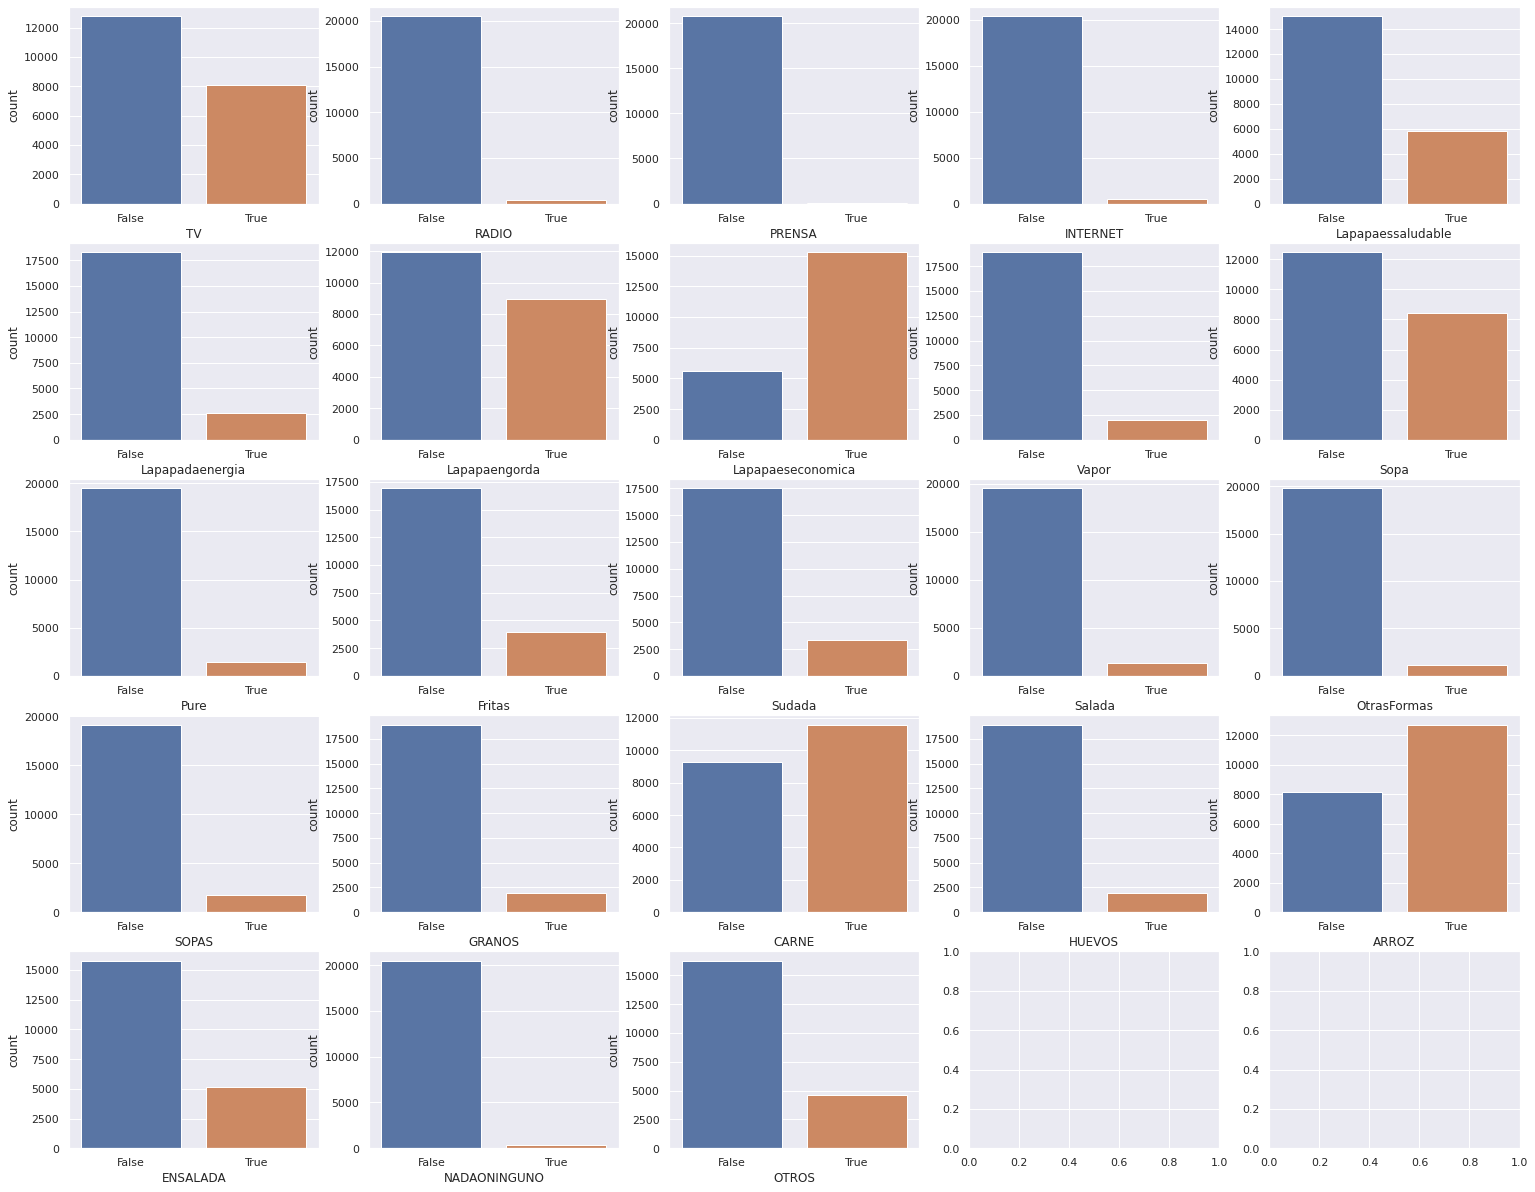

In [10]:
# analisa visualmente proporcionalidade de binaria para cara variavel / caracteristica
fig, ax = plt.subplots(nrows=5, ncols=5)
for i, col in enumerate(papa.columns):
    c = i % 5
    r = i // 5
    sns.countplot(col, data=papa, ax=ax[r, c])
plt.show()

In [0]:
# nao e preciso usar o transactionEncoder pois os dados ja estao no formato one-hot encoding

In [12]:
# aplicamos o apriori
itens_freq = apriori(papa,
                     min_support=0.05,
                     use_colnames=True)

itens_freq.sort_values(by='support', ascending=False)

,support,itemsets
4,0.731803,(Lapapaeseconomica)
16,0.609612,(ARROZ)
14,0.555225,(CARNE)
58,0.440174,"(ARROZ, Lapapaeseconomica)"
3,0.428578,(Lapapaengorda)
...,...,...
165,0.050889,"(TV, Lapapadaenergia, ARROZ, CARNE)"
94,0.050601,"(Fritas, TV, Lapapaeseconomica)"
82,0.050553,"(Fritas, Lapapaessaludable, TV)"
114,0.050266,"(Lapapaessaludable, CARNE, ENSALADA)"


In [0]:
regras_assoc = association_rules(itens_freq, 
                                 metric='confidence',
                                 min_threshold=0.1)

In [14]:
cols = ['antecedents', 'consequents', 'support', 'confidence']
assoc = regras_assoc[cols].sort_values(by='confidence', ascending=False)
assoc.head(10)

,antecedents,consequents,support,confidence
704,"(ARROZ, Lapapadaenergia, CARNE)",(TV),0.050889,0.994382
692,"(ARROZ, Lapapadaenergia, Lapapaeseconomica)",(TV),0.054387,0.992133
169,"(ARROZ, Lapapadaenergia)",(TV),0.071014,0.991968
163,"(Lapapadaenergia, CARNE)",(TV),0.068331,0.987535
680,"(Lapapadaenergia, CARNE, Lapapaeseconomica)",(TV),0.052326,0.984671
3,(Lapapadaenergia),(TV),0.120130,0.970201
554,"(Lapapaessaludable, CARNE, Lapapaengorda)",(TV),0.060856,0.969466
114,"(Lapapaessaludable, Lapapaengorda)",(TV),0.103790,0.968261
568,"(Lapapaessaludable, ARROZ, Lapapaengorda)",(TV),0.061479,0.966114
157,"(Lapapadaenergia, Lapapaeseconomica)",(TV),0.092146,0.965846


In [15]:
print('Total de associaçoes com confiança >= 10% = {}'.format(assoc.shape[0]))
print('Total de associaçoes com confiança >= 50% = {}'.format(assoc[assoc.confidence >= 0.5].shape[0]))

Total de associaçoes com confiança >= 10% = 1124
Total de associaçoes com confiança >= 50% = 323


In [16]:
assoc_50 = assoc[assoc.confidence >= 0.5]
print("""Associaçõões com confiança maior que 50% que tem como consequente
 a ideia de que a batata engorda: {}""".format(assoc_50[assoc_50.consequents.apply(lambda x : 'Lapapaengorda' in x)].shape[0]))

Associaçõões com confiança maior que 50% que tem como consequente
 a ideia de que a batata engorda: 0


In [0]:
lapapaengorda = assoc[assoc.consequents.apply(lambda x : 'Lapapaengorda' in x)]

In [18]:
print("Associações com a conclusao de que a batata engorda, com confiança >= 10% : {}\n".format(lapapaengorda.shape[0]))
print("Estatisticas da confiança do consquente 'Lapapaengorda': {}".format(lapapaengorda.describe()['confidence']))

Associações com a conclusao de que a batata engorda, com confiança >= 10% : 169

Estatisticas da confiança do consquente 'Lapapaengorda': count    169.000000
mean       0.278948
std        0.112259
min        0.100849
25%        0.174384
50%        0.278857
75%        0.386143
max        0.480342
Name: confidence, dtype: float64


In [19]:
lapapaengorda.head(15)

,antecedents,consequents,support,confidence
387,"(Sopa, ENSALADA)",(Lapapaengorda),0.053860,0.480342
935,"(ARROZ, CARNE, ENSALADA)",(Lapapaengorda),0.073123,0.479271
409,"(CARNE, ENSALADA)",(Lapapaengorda),0.082036,0.476085
415,"(ARROZ, ENSALADA)",(Lapapaengorda),0.093775,0.457350
921,"(ARROZ, Sopa, CARNE)",(Lapapaengorda),0.081844,0.454860
896,"(ENSALADA, CARNE, Lapapaeseconomica)",(Lapapaengorda),0.055106,0.451866
56,(ENSALADA),(Lapapaengorda),0.110690,0.451436
1070,"(ARROZ, Sopa, CARNE, Lapapaeseconomica)",(Lapapaengorda),0.056879,0.445738
46,(Sopa),(Lapapaengorda),0.179309,0.445423
375,"(Sopa, CARNE)",(Lapapaengorda),0.100819,0.442668


### **Conclusão**
Curiosamente, os itens mais comumente associados à percepção de que a batata engorda são outros itens alimentícios, como arroz, sopa ou até mesmo salada.

Levando também em consideração o suporte dessa percepção, podemos notar que arroz (sup. 26%), sopa (sup 17.9%) e carne + arroz (17.6%) são os items mais frequentemente associados com essa percepção.

O fato da confiança ser inferior a 50% mas maior que 40% para os casos acima deve ser considerado e levado em conta caso a presente análise venha a ser utilizada numa tomada de decisão. 

Valeria a pena testar numa rede varejista afastar as batatas e produtos derivados de batata do arroz, da sopa e das saladas.